# DEEP LEARNING USING PYTHON

# FORWARD PROGRESSION:

![Image](img/1.png)

In [1]:
import numpy as np
input_data = np.array([2,3])

weights = {'node_0': np.array([1,1]),
           'node_1': np.array([-1,1]),
           'output': np.array([2,-1])}

node_0_value = (input_data*weights['node_0']).sum()

node_1_value = (input_data*weights['node_1']).sum()


hidden_layer_values = np.array([node_0_value,node_1_value])
print(hidden_layer_values)

[5 1]


In [2]:
output = (hidden_layer_values*weights['output']).sum()
print(output)

9


# THE RECTIFIED LINEAR ACTIVATION FUNCTION:

Here, the hidden layer has the tanh() function which act as internal function to operate between the hidden node_input and node_output

In [3]:
import numpy as np

input_data = np.array([-1,2])

weights = {'node_0': np.array([3,3]),
           'node_1': np.array([1,5]),
           'output': np.array([2,-1])}

node_0_input = (input_data*weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)

node_1_input = (input_data*weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)

hidden_layer_output = np.array([node_0_output,node_1_output])

output = (hidden_layer_output * weights['output']).sum()

print(output)

0.9901095378334199



# Gradient Descent


In [4]:
import numpy as np

input_data = np.array([3,4])
weights = np.array([1,2])
target = 6
learning_rate = 0.01

prediction = (weights * input_data).sum()
error = prediction - target
print(error)

5


In [5]:
#slope

gradient = 2 * input_data * error
gradient

array([30, 40])

In [6]:
weights_updated = weights - (learning_rate * gradient)
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

2.5


In [7]:
gradient = 2 * input_data * error_updated
gradient

array([15., 20.])

In [8]:
weights_updated1 = weights_updated - (learning_rate * gradient)
preds_updated1 = (weights_updated1 * input_data).sum()
error_updated1 = preds_updated1 - target
print(error_updated1)

1.25


In [9]:
gradient = 2 * input_data * error_updated1
gradient

array([ 7.5, 10. ])

In [10]:
weights_updated2 = weights_updated1 - (learning_rate * gradient)
preds_updated2 = (weights_updated2 * input_data).sum()
error_updated2 = preds_updated2 - target
print(error_updated2)

0.625


In [11]:
gradient = 2 * input_data * error_updated2
gradient

array([3.75, 5.  ])

In [12]:
weights_updated3 = weights_updated2 - (learning_rate * gradient)
preds_updated3 = (weights_updated3 * input_data).sum()
error_updated3 = preds_updated3 - target
print(error_updated3)

0.3125


In [13]:
gradient = 2 * input_data * error_updated3
gradient

array([1.875, 2.5  ])

In [14]:
weights_updated4 = weights_updated3 - (learning_rate * gradient)
preds_updated4 = (weights_updated4 * input_data).sum()
error_updated4 = preds_updated4 - target
print(error_updated4)

0.15625


In [15]:
gradient = 2 * input_data * error_updated3
gradient

array([1.875, 2.5  ])

In [16]:
weights_updated5 = weights_updated4 - (learning_rate * gradient)
preds_updated5 = (weights_updated5 * input_data).sum()
error_updated5 = preds_updated5 - target
print(error_updated5)

8.881784197001252e-16


In [17]:
preds_updated

8.5

In [18]:
gradient = 2 * input_data * error_updated3
gradient

array([1.875, 2.5  ])

In [19]:
weights_updated6 = weights_updated5 - (learning_rate * gradient)
preds_updated6 = (weights_updated6 * input_data).sum()
error_updated6 = preds_updated6 - target
print(error_updated6)

-0.1562499999999991


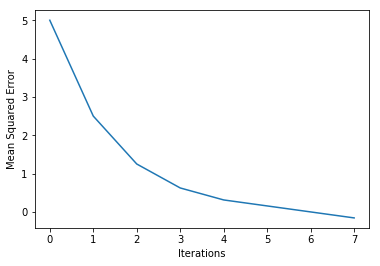

In [21]:
import matplotlib.pyplot as plt
mse_hist = []
mse_hist = [error,error_updated,error_updated1,error_updated2,error_updated3,error_updated4,error_updated5,error_updated6]
Iterations = [0,1,2,3,4,5,6]
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

Here we see that the mean square error goes down which improve the accuracy of our neural netwok as error gets updated again and again and after certain interval it becomes negative which shows that the itteration in learning rate in order to find the predictive value crosses the actual value.

# Creating A Keras Model

Model Building Steps:
    Specify Architecture
    Compile
    Fit
    Predict

In [ ]:
#SPECIFY ARCHITECTURE
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

predictors = np.loadtxt('predictor_data.csv', delimeter = ',')
n_cols = predictors.shape[1]

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))


COMPILING AND FITTING A MODEL

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(predictors, target)

CLASSIFICATION MODEL

In [ ]:
import pandas as pd
from keras.utils import to_categorical
data = pd.read_csv('basketball_shot_log.csv')

predictiors = data.drop(['shot_result'], axis= 1).as_matrix()
target = to_categorical(data.shot_result)

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy',matrics = ['accuracy'])
model.fit(predictors,target)

Saving, Reloading, Prediction

In [ ]:
from keras.model import load_model
model.save('model_file.h5')
my_model = load_model('my_model.h5')
predictions = my_model.predict(data_to_predict_with)
probability_true = predictions[:,1]

Stochastic Gradient Descent


In [ ]:
from keras.optimizers import SGD
def get_new_model(nput_shape =  input_shape):
    model = Sequential()
    model.add(Dense(100, activation = 'relu', input_shape = input_shape))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))
    return(model)

lr_to-test = [0.000001, 0.01, 1]
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss='categorical_crossentropy')
    model.fit(predictors,target)

Model Validation

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', matrics = ['accuracy'])
model.fit(predictors, target, validation_split=0.3)

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(predictors, target, validation_split=0.3, epochs=20,callbacks=[early_stopping_monitor])

OVERFITTING AND UNDERFITTING

![Image](img/7.png)

Workflow For Optimizing model capacity:


1 Start with a smallnetwork
2 Get the validation score
3 keep increasing capacity until validation score is no longer   improving


Thinking about model capacity

![Image](img/2.png)

So, on the whole we can conclude that the 3 hidden layers and 200 nodes per layer with approax 4.3 mean squarred error is good for the model.


THANKYOU!